In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_train.csv',header = None)
data = np.array(df)
X = (data[:,1:].transpose())/255
m = X.shape[1]
n = X.shape[0]
Y_orig = data[:,0:1].transpose()
print(Y_orig)
Y = np.zeros((10,m))
for i in range(m): 
    Y[int(Y_orig[0,i]),i] = 1
print(Y[:,0])

[[5 0 4 ... 5 6 8]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
def relu(Z):
    result = (Z + np.abs(Z))/2
    return result

In [4]:
def relu_backward(Z):
    result = (Z + np.abs(Z))/(2*np.abs(Z))
    return result

In [5]:
def softmax(Z):
    temp = np.exp(Z)
    result = temp/np.sum(temp,axis = 0,keepdims = True)
    return result

In [6]:
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1
    for l in range(1,L + 1):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
        #print(parameters)
    return parameters

In [7]:
def forward_prop(X,parameters):
    cache = {}
    L = len(layer_dims) - 1
    A_prev = X
    for l in range(1,L):
        Z = parameters["W" + str(l)].dot(A_prev) + parameters["b" + str(l)]
        A = relu(Z)
        cache["Z" + str(l)] = Z
        A_prev = A
    Z = parameters["W" + str(L)].dot(A_prev) + parameters["b" + str(L)]
    AL = softmax(Z)
    cache["Z" + str(L)] = Z
    return AL,cache

In [8]:
def compute_cost(AL,Y):
    m = AL.shape[1]
    cost = (np.sum(-(Y * np.log(AL))))/(m)
    return cost

In [9]:
def backward_prop(X,Y,cache,parameters,AL,layer_dims):
    m = X.shape[1]
    dparameters = {}
    L = len(layer_dims) - 1
    dZ = AL - Y
    dparameters["dW" + str(L)] = dZ.dot(relu(cache["Z" + str(L-1)]).transpose())/m
    #dparameters["dW" + str(L)] = dZ.dot(X.transpose())/m
    dparameters["db" + str(L)] = np.sum(dZ,axis = 1,keepdims = True)/m
    for l in range(1,L):
        dZ = ((parameters["W" + str(L-l+1)].transpose()).dot(dZ)) * (relu_backward(cache["Z" + str(L-l)]))
        if L-l-1 != 0:
            dparameters["dW" + str(L-l)] = dZ.dot(relu(cache["Z" + str(L-1-l)]).transpose())/m
        else:
            dparameters["dW" + str(L-l)] = dZ.dot(X.transpose())/m
        dparameters["db" + str(L-l)] = np.sum(dZ,axis = 1,keepdims = True)/m
    return dparameters  

In [10]:
def update_parameters(parameters,dparameters,layer_dims,learning_rate):
    L = len(layer_dims) - 1
    for l in range(1,L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*dparameters["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*dparameters["db" + str(l)]
    return parameters

In [11]:
def model(X,Y,layer_dims,learning_rate,num_iters):
    costs = []
    parameters = initialize_parameters(layer_dims)
    for i in range(num_iters):
        AL,cache = forward_prop(X,parameters)
        cost = compute_cost(AL,Y)
        costs.append(cost)
        dparameters = backward_prop(X,Y,cache,parameters,AL,layer_dims)
        parameters = update_parameters(parameters,dparameters,layer_dims,learning_rate)
        print(i,"\t",cost)
    return parameters,costs

In [12]:
#trainig
layer_dims = [784,200,170,120,90,10]
parameters,costs = model(X,Y,layer_dims,0.3,2000)

0 	 2.3025848109622693
1 	 2.302498685872492
2 	 2.3024178681960037
3 	 2.302342252618535
4 	 2.302271077599573
5 	 2.30220414538672
6 	 2.302141349429591
7 	 2.3020821204609865
8 	 2.3020264919042592
9 	 2.3019741459885994
10 	 2.3019249884250748
11 	 2.301878763307703
12 	 2.3018353824813054
13 	 2.301794496855479
14 	 2.3017560520924327
15 	 2.301719904954406
16 	 2.3016859606179856
17 	 2.301654074129558
18 	 2.301624139519707
19 	 2.3015959454779376
20 	 2.3015694288699886
21 	 2.3015445129071153
22 	 2.301521098111887
23 	 2.301499092710449
24 	 2.3014784056783824
25 	 2.301459017941663
26 	 2.301440761373677
27 	 2.3014235907039344
28 	 2.301407478648739
29 	 2.3013923672447767
30 	 2.3013781258867434
31 	 2.301364736913707
32 	 2.3013521587805603
33 	 2.3013403592866966
34 	 2.3013292707959647
35 	 2.301318841273988
36 	 2.301309054352426
37 	 2.3012998448743303
38 	 2.3012911938980825
39 	 2.3012830782561853
40 	 2.301275442530462
41 	 2.3012682745543427
42 	 2.301261534913934

339 	 2.3011544057005135
340 	 2.3011544017604924
341 	 2.301154392073507
342 	 2.301154386795575
343 	 2.3011543858550096
344 	 2.3011543749178913
345 	 2.301154371214968
346 	 2.301154368288591
347 	 2.301154361545438
348 	 2.3011543609457448
349 	 2.301154342647539
350 	 2.301154342211111


KeyboardInterrupt: 

In [ ]:
plt.plot(costs)

In [ ]:
#training
df = pd.read_csv('mnist_test.csv',header = None)
data = np.array(df)
X_test = (data[:,1:].transpose())/255
Y_test = data[:,0:1].transpose()
accuracy = 0
m_test = X_test.shape[1]
predict = np.zeros((1,m_test))
A_test,cache = forward_prop(X_test,parameters)
for i in range(m_test):
    max = 0
    for j in range(10):
        if A_test[j,i] > max:
            max = A_test[j,i]
            max_index = j
        predict[0,i] = max_index
    if predict[0,i] == Y_test[0,i]:
        accuracy = accuracy + 1
accuracy = (accuracy/m_test)*100
print(accuracy,"%")
index = 0

Its a 6


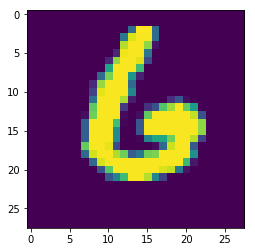

In [21]:
#change index toview different examples
index = 56845
print("Its a",int(predict[0,index]))
plt.imshow(X_test[:,index].reshape(28,28))